Question:
-   How many characters are there? What are their names?
-   For each character, find out who has the most lines across all episodes
-   What is the average of words per line for each character?
-   What is the most common word per character
-   Number of episodes where the character does not have a line, for each character
-   Number of time "That's what she said" joke comes up
    -   Include five examples of the joke
-   The average percent of lines each character contributed each episode per season.
-   Come up with 2-3 interesting questions yourself surrounding the dataset 
    -   for most frequent word, I am interested in a word clound 
    -   who say these frequent words most

In [2]:
#initialization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
from wordcloud import WordCloud
import re

df=pd.read_csv("the_office_lines_scripts.csv")

In [3]:
# play around the data and I find we should pay attention to the column 'deleted'
df.head()
df.info()
df=df[df['deleted']==False]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59909 non-null  int64 
 1   season     59909 non-null  int64 
 2   episode    59909 non-null  int64 
 3   scene      59909 non-null  int64 
 4   line_text  59909 non-null  object
 5   speaker    59909 non-null  object
 6   deleted    59909 non-null  bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


In [5]:
"""
Q1: How many characters are there? What are their names?

"""

# the initial distinct character list doesn't look good since the data is messy
character_list=list(set(df['speaker'].tolist()))
stat=df.groupby(['speaker']).size().to_frame(name="count").reset_index()
stat_sort=stat.sort_values(by='count')
stat_sort

,speaker,count
0,(Pam's mom) Heleen,1
426,Man in Video,1
424,Man 3,1
422,Man 1,1
420,Male voice,1
...,...,...
23,Andy,3968
541,Pam,5206
354,Jim,6611
212,Dwight,7169


In [ ]:
"""
# Solution 1: directly clean the data (takes lots of time)
# Below are issues I notice and the solution I provide

#issue 1: upper and lower case
df.speaker=df.speaker.str.lower()

#issue 2: separate 'and','&',',','/' and explode

df.speaker=df.speaker.str.split("and|&|,|/")
df=df.explode("speaker")
stat=df.groupby(['speaker']).size().to_frame(name="count").reset_index()
stat_sort=stat.sort_values(by='count')

#issue 3: delete speaker that contains below words since they are not characters
#Man, Male, Female, employee, worker, guy, reporter, lady, officer, everyone, partner,client, all, stylist,
#narrator, operator, crew, waitress, waiter, vrg, voice, agent,student
#
non_character=['female','employee','worker','guy','reporter','lady',
               'officer','everyone','partner','client','stylist','narrator','operator','crew','waitress','waiter',
               'voice','agent','student','teammates','entire','office','screen',
               'girl','unknown','computer','sister','computer','guest','various','buyer','announcer','member',
               'phone','together','council','group','bouncer','neighbor','people','blogger','i\'m','camera',
               'father','mother','\[','\]','teacher','intern','fake','video','applicant','children','drummer','shareholder',
               'woman','credit','puberty','sales','refrigeration','actress','assistant','message']

#issue 4: delete speaker that begins with below words since they are not characters but cannot use the method
# in issue 3 since it will accidentally delete some speajers
# remove start with man, male, woman, men...

#issue 5: directly remove some unrelated characters
non_character_removal=['d','hunter\'s cd','stu','boom box','a','radio','prince son','s','abe']

df=df[~df.speaker.str.contains("|".join(non_character))]
df=df[df.speaker.str.isin(non_character_removal)]
stat=df.groupby(['speaker']).size().to_frame(name="count").reset_index()
stat_sort=stat.sort_values(by='count')

#issue 6: remove space which caused by issue 2
df.speaker=df.speaker.str.strip()
stat=df.groupby(['speaker']).size().to_frame(name="count").reset_index()
stat_sort=stat.sort_values(by='count')

#issue 7: typo such as wrong spell of michael


"""


In [8]:
# Solution 2: only picks the characters with more than 15 frequency 
# Use Cumsum and observe the difference in cumsum array
sum_count=np.sum(stat_sort['count'])
sum_count
stat_count=np.cumsum(stat_sort['count'])
np.diff(stat_count)

0          1
426        2
424        3
422        4
420        5
       ...  
23     27410
541    32616
354    39227
212    46396
459    57973
Name: count, Length: 786, dtype: int64

In [9]:
# After observation, I believe 15 is a decent count 
# I didn't consider the typo and "and" issues since the lines are not too many to affect the result
characters=stat[stat['count']>=15].sort_values(by='count')
non_character=['Improv Teacher','Senator','Receptionist','Blood Girl','Ex-Client','Ex-client','Billy Merchant','Pam\'s Mom',
               'Prince Grandfather','Crowd','Bar Manager','Pizza guy','Woman','Nurse','Host','Group','Man','Everyone','All']
characters=characters[~characters.speaker.isin(non_character)]
characters
# It seems that we have 97 characters and their lines count below



,speaker,count
779,Zeke,15
625,Robert California,15
410,Lynn,16
383,Kenny,17
639,Ryan Howard,17
...,...,...
23,Andy,3968
541,Pam,5206
354,Jim,6611
212,Dwight,7169


In [16]:
"""

Q2: Find out who has the most lines across all episodes

"""

lines=df[df['speaker'].isin(characters['speaker'])]
lines_count=lines[['line_text','speaker']].groupby(['speaker']).size()
print(lines_count.idxmax(),"has the most lines with",lines_count.max())

Michael has the most lines with 11577


In [17]:
"""

Q3: What is the average of words per line for each character?

"""
#issue 1: exclude words in[]
lines2=lines.copy(deep=True)
lines2['word_count']=lines2['line_text'].apply(lambda x: len(re.sub(u"\\[.*?\\]","",x).split()))
avg_word_line=lines2[['speaker','word_count']].groupby(['speaker']).mean()
avg_word_line

,word_count
speaker,
AJ,5.521739
Alan,11.300000
Alice,9.263158
Andy,11.768145
Angela,8.589867
...,...
Val,5.671233
Vikram,7.523810
Waiter,6.950000


In [18]:
"""

Q4: What is the most common word per character

"""
#issue 1: exclude punctuation marks
lines2['words']=lines2['line_text'].apply(lambda x: re.sub('[^A-Za-z0-9\'-]+'," ",x).split())
word_line=lines2[['speaker','words']].groupby(['speaker']).agg(sum)
#word_line['max_word']=word_line['words'].apply(lambda x:max(x,key=x.count))
#issue 2: above solution super slow and thus use another approach
from collections import Counter
word_line['max_word2']=word_line['words'].apply(lambda x:Counter(x).most_common(1)[0][0])
word_line.max_word2

speaker
AJ          a
Alan       to
Alice      to
Andy        I
Angela      I
         ... 
Val       you
Vikram    you
Waiter    you
Walter    you
Zeke      the
Name: max_word2, Length: 97, dtype: object

In [19]:
"""

Q5: Number of episodes where the character does not have a line, for each character

"""
lines2['ss.ep']=lines2['season'].astype(str)+'.'+lines2['episode'].astype(str)+','
episode_list=set((lines2['season'].astype(str)+'.'+lines2['episode'].astype(str)))
episode_count=lines2[['ss.ep','speaker']].groupby(['speaker']).agg(sum)
episode_count['ss.ep']=episode_count['ss.ep'].apply(lambda x: set(x[:-1].split(',')))
episode_count['no_line_episode']=episode_count['ss.ep'].apply(lambda x:episode_list - x)
episode_count.no_line_episode



speaker
AJ        {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Alan      {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Alice     {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Andy      {2.15, 2.19, 2.12, 3.15, 1.5, 2.14, 2.6, 2.17,...
Angela    {8.7, 5.17, 5.21, 7.16, 5.14, 8.15, 5.22, 7.13...
                                ...                        
Val       {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Vikram    {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Waiter    {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Walter    {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Zeke      {6.7, 3.4, 8.18, 2.14, 3.1, 2.17, 3.14, 7.1, 6...
Name: no_line_episode, Length: 97, dtype: object

In [29]:
"""

Q6: Number of time "That's what she said" joke comes up
    -   Include five examples of the joke
    -   "I mean, they're just dough twisted up with some candy. They taste so good in my mouth.""That's what she said. [Stanley and Michael both laugh]"
    -   "Thanks! I, I wanna give you something.""Oh. [She whispers in his ear. Michael starts to laugh] That's what she said."
    -   "Ok, you know what? I want you to think about your future in this company. I want you to think about it long and hard.""That's what she said."
    -   "Let's just blow this party off.""That's what she said."
    -   "Why is this so hard? That's what she said. Oh my God. What am I saying?"
    
"""
joke_id=lines2[lines2['line_text'].str.contains("That\'s what she said")]['id'].reset_index()
joke_id_list=joke_id['index'].append(joke_id['id']).sort_values()
# Here I use index of the line that contains that's what she said and the index before this line
# So that it will contain the full joke but not just a line of "that's what she said"
joke=lines2[lines2['id'].isin(joke_id_list)]
joke[['season','episode','line_text','speaker']].head(10)

,season,episode,line_text,speaker
2543,2,2,"No, thanks. I'm good.",Jim
2544,2,2,That's what she said. Pam?,Michael
6321,2,12,That's what she said.,Dwight
7642,2,17,I have a ton of stuff to do for the wedding. A...,Pam
7643,2,17,That's what she said!,Michael
8870,2,21,You already did me.,Angela
8871,2,21,That's what she said. [Jim mouths these words ...,Michael
10902,3,5,"I mean, they're just dough twisted up with som...",Michael
10903,3,5,That's what she said. [Stanley and Michael bot...,Stanley
12593,3,10,Oh. [She whispers in his ear. Michael starts t...,Michael


In [30]:
"""
Q7: The average percent of lines each character contributed each episode per season

"""
percent_lines=lines2.groupby(['ss.ep','speaker'])['line_text'].count().reset_index(level='speaker')
percent_lines2=percent_lines.groupby('ss.ep').sum()
percent_lines1=percent_lines.merge(percent_lines2,on='ss.ep')
percent_lines1=percent_lines1.rename(columns={'line_text_x':'lines_per_character','line_text_y':'lines_per_episode'})
percent_lines1['percent_of_lines(%)']=round(percent_lines1['lines_per_character']/percent_lines1['lines_per_episode'],4)*100
percent_lines1.index=percent_lines1.index.str[:-1]
percent_lines1

,speaker,lines_per_character,lines_per_episode,percent_of_lines(%)
ss.ep,,,,
1.1,Angela,1,227,0.44
1.1,Dwight,29,227,12.78
1.1,Jan,12,227,5.29
1.1,Jim,36,227,15.86
1.1,Kevin,1,227,0.44
...,...,...,...,...
9.9,Pam,32,287,11.15
9.9,Pete,22,287,7.67
9.9,Phyllis,10,287,3.48


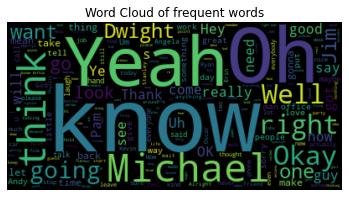

In [31]:
"""

Q8: for most frequent word, I am interested in a word clound 

"""

word_string=""
for i in word_line.words: word_string=word_string+" ".join(i)
wordcloud=WordCloud().generate(word_string)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of frequent words")
plt.show()



In [26]:
"""

Q9: It seems "know" "Yeah" "oh" and "Michael" are the most frequent words, who say these words most

"""
word_line['string'] = [' '.join(map(str, l)) for l in word_line['words']]
word_line['know']=word_line['string'].apply(lambda x:x.count('know'))
word_line['yeah']=word_line['string'].apply(lambda x:x.count('yeah'))
word_line['oh']=word_line['string'].apply(lambda x:x.count('oh'))
word_line['Michael']=word_line['string'].apply(lambda x:x.count('Michael'))
print(word_line.know.idxmax(),"speaks most 'know' with ",word_line.know.max()," times")
print(word_line.yeah.idxmax(),"speaks most 'yeah' with ",word_line.yeah.max()," times")
print(word_line.oh.idxmax(),"speaks most 'oh' with ",word_line.oh.max()," times")
print(word_line.Michael.idxmax(),"speaks most 'Michael' with ",word_line.Michael.max()," times")

Michael speaks most 'know' with  1317  times
Michael speaks most 'yeah' with  122  times
Michael speaks most 'oh' with  151  times
Dwight speaks most 'Michael' with  419  times
